Import

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Read CSV

In [24]:
df_bordeaux = pd.read_csv("bordeaux/listings_bordeaux.csv")


In [25]:
df_bordeaux.columns


Index(['id', 'description', 'host_id', 'host_name', 'host_response_rate',
       'host_acceptance_rate', 'host_verifications', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'room_type', 'bathrooms', 'bathrooms_text',
       'amenities', 'price', 'number_of_reviews'],
      dtype='object')

### Question n°1  

In [26]:
df_q1= df_bordeaux.groupby("neighbourhood_cleansed").apply(lambda s: pd.Series({ 
    "host_count": s["host_id"].nunique(), 
    "sum_reviews": s["number_of_reviews"].sum(), 
}))



In [27]:
df_q1.reset_index( inplace=True)

In [28]:
df_q1

,neighbourhood_cleansed,host_count,sum_reviews
0,3M-Bourgailh,8,98
1,Ambars-et-Lagrave,65,904
2,Ambs,49,1714
3,Arago-La Chataigneraie,43,1583
4,Arlac,90,2973
...,...,...,...
57,Sardine,17,788
58,Talence,429,13571
59,Toctoucau,16,479
60,Verthamon,24,799


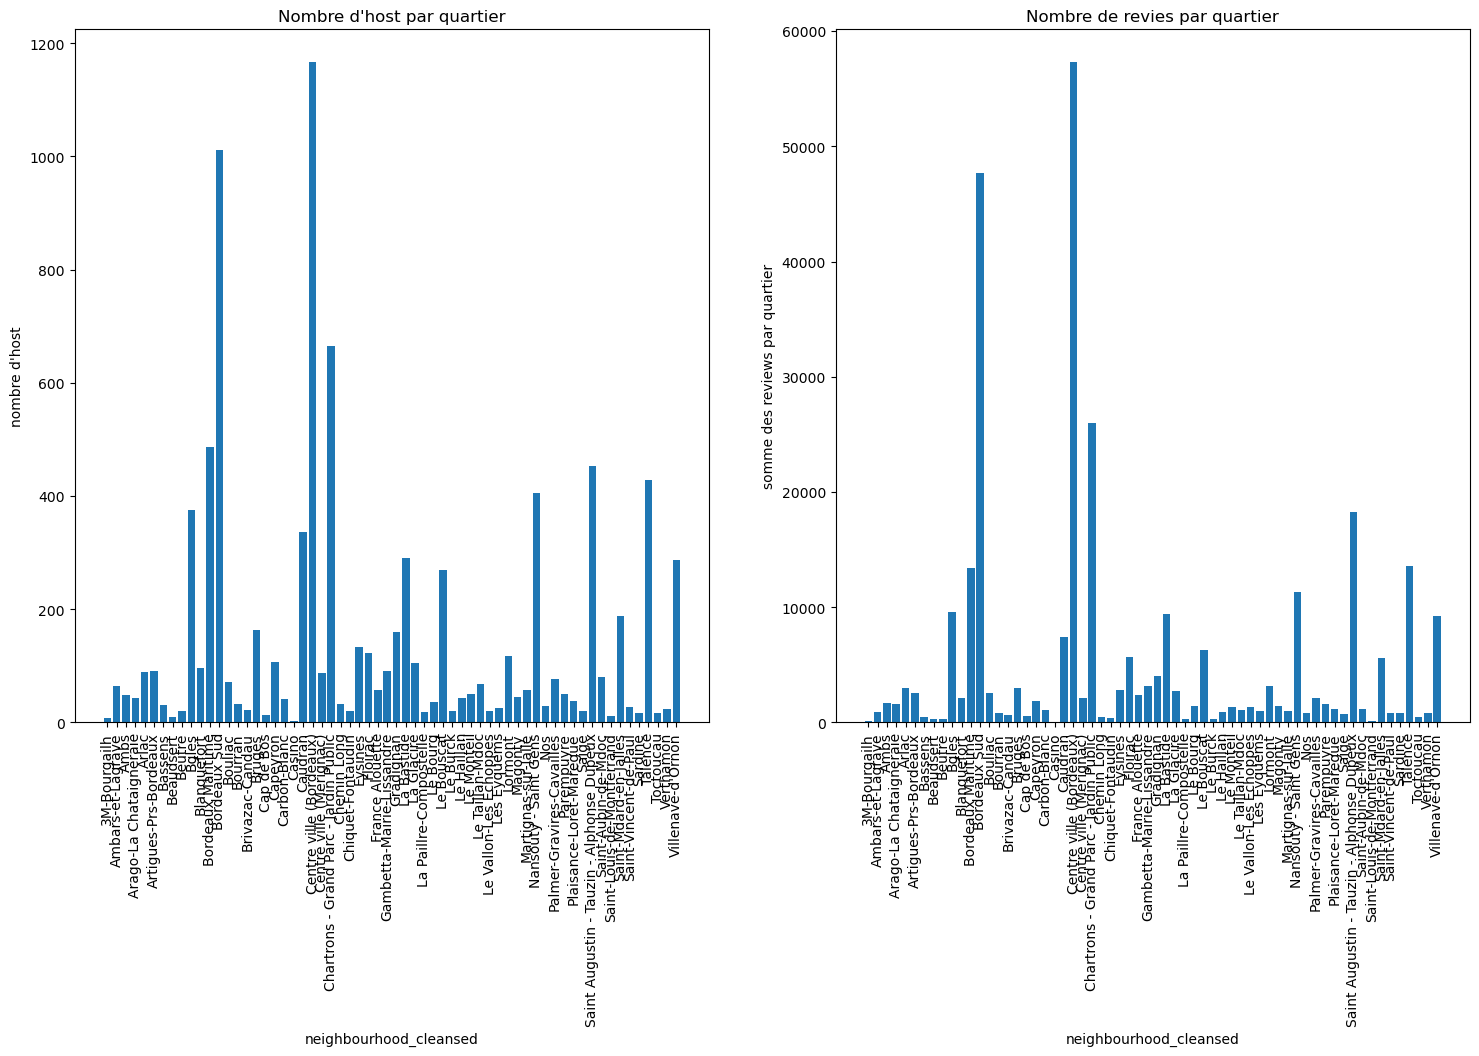

In [29]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.bar(df_q1.neighbourhood_cleansed,df_q1.host_count)
plt.title("Nombre d'host par quartier")
plt.xlabel("neighbourhood_cleansed")
plt.ylabel("nombre d'host")
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
plt.bar(df_q1.neighbourhood_cleansed,df_q1.sum_reviews)
plt.title("Nombre de revies par quartier")
plt.xlabel("neighbourhood_cleansed")
plt.ylabel("somme des reviews par quartier")
plt.xticks(rotation = 90)

plt.show()

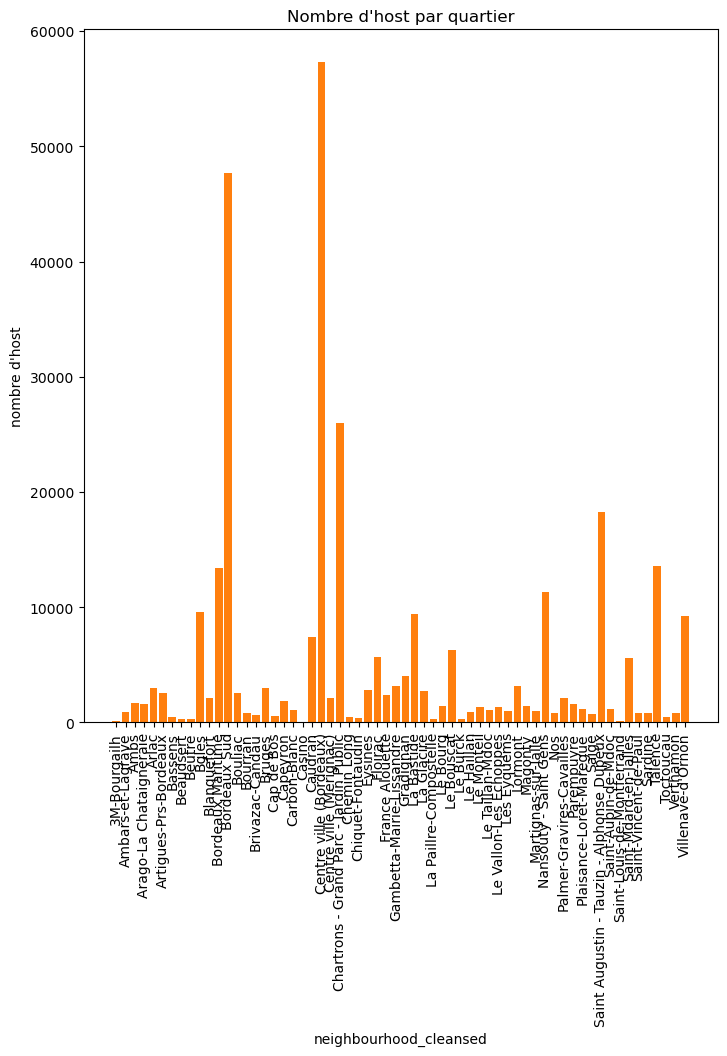

In [78]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.bar(df_q1.neighbourhood_cleansed,df_q1.host_count,label="nombre d'host")
plt.bar(df_q1.neighbourhood_cleansed,df_q1.sum_reviews,label="nombre de comantaire")
plt.title("Nombre d'host par quartier")
plt.xlabel("neighbourhood_cleansed")
plt.ylabel("nombre d'host")
plt.xticks(rotation = 90)
plt.show()

### Question n°2

In [30]:
df_host_acceptance_rate=df_bordeaux["host_acceptance_rate"].str.rstrip('%').astype(float)

df_host_acceptance_rate.mean()

82.1015107341638

/tmp/ipykernel_6715/1044500727.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


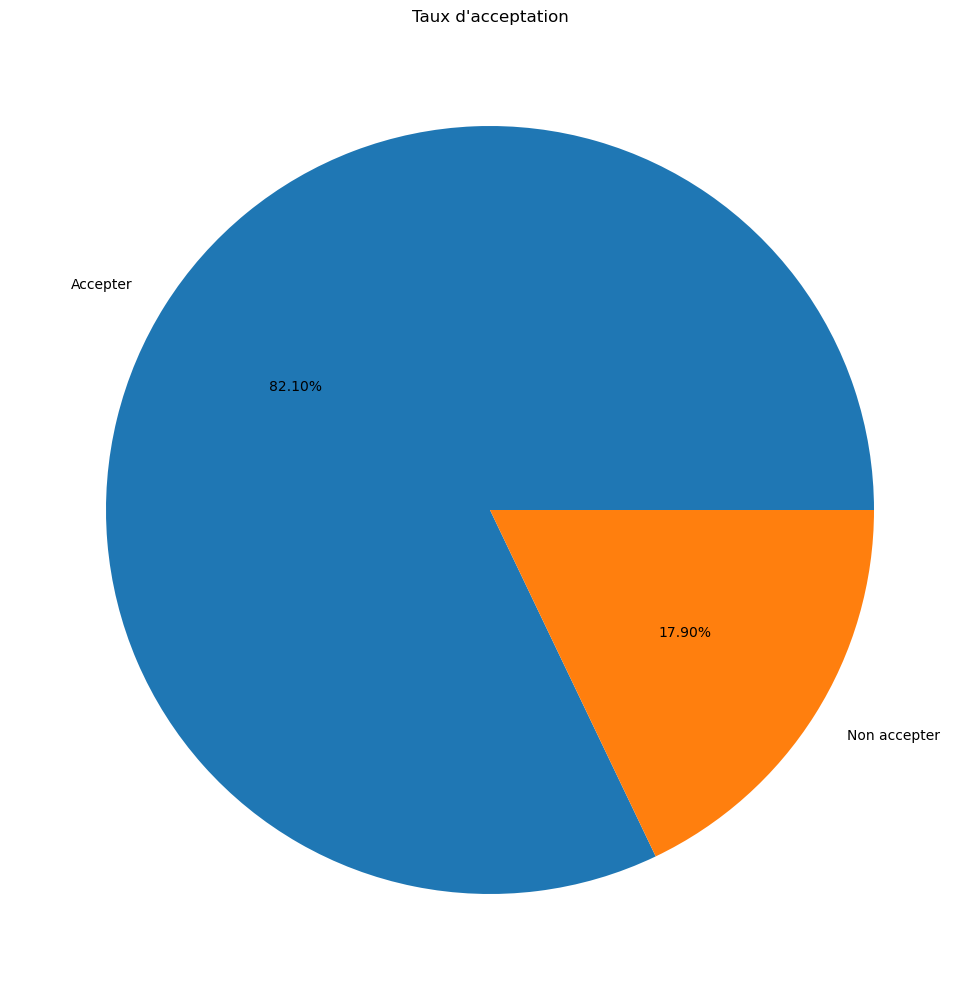

In [31]:
fig= plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.set_title("Taux d'acceptation")
label= ["Accepter","Non accepter"]
ax.pie([df_host_acceptance_rate.mean(),100-df_host_acceptance_rate.mean()],labels=label,autopct= '%1.2f%%')
fig.show()

In [32]:
df_host_response_rate=df_bordeaux["host_response_rate"].str.rstrip('%').astype(float)

df_host_response_rate.mean()

93.4806598407281

/tmp/ipykernel_6715/3876295453.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


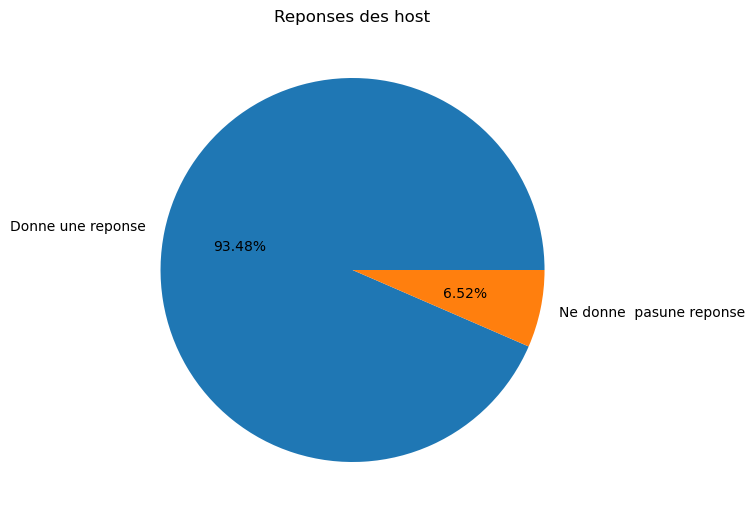

In [33]:
fig= plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Reponses des host")
label= ["Donne une reponse","Ne donne  pasune reponse"]
ax.pie([df_host_response_rate.mean(),100-df_host_response_rate.mean()],labels=label,autopct= '%1.2f%%')
fig.show()

### Question n°3

In [34]:
df_bordeaux[['id',"host_verifications"]].groupby("host_verifications").count()/len(df_bordeaux)*100

,id
host_verifications,
"['email', 'phone', 'work_email']",6.219568
"['email', 'phone']",85.319247
"['email', 'work_email']",0.009187
['email'],0.413413
"['phone', 'work_email']",0.220487
['phone'],7.533303
[],0.284796


In [35]:
df_bordeaux.replace(to_replace="work_email", value='work', regex=True,inplace=True)

In [36]:
email = df_bordeaux["host_verifications"].apply(lambda elt: 1 if 'email' in elt else 0 ).sum()
phone = df_bordeaux["host_verifications"].apply(lambda elt: 1 if 'phone' in elt else 0 ).sum()
work = df_bordeaux["host_verifications"].apply(lambda elt: 1 if 'work' in elt else 0 ).sum()
vide = df_bordeaux["host_verifications"].apply(lambda elt: 1 if elt == "[]" else 0 ).sum()
  
print("Il y a {0} personnes qui utilise un email pour la vérification soit {1} %".format(email,email/len(df_bordeaux)*100))
print("Il y a {0} personnes qui utilise un téléphone pour la vérification soit {1} %".format(phone,phone/len(df_bordeaux)*100))
print("Il y a {0} personnes qui utilise un email pro pour la vérification soit {1} %".format(work,work/len(df_bordeaux)*100))
print("Il y a {0} personnes qui n'ont pas  pour la vérification soit {1} %".format(vide,vide/len(df_bordeaux)*100))

Il y a 10010 personnes qui utilise un email pour la vérification soit 91.96141479099678 %
Il y a 10808 personnes qui utilise un téléphone pour la vérification soit 99.29260450160771 %
Il y a 702 personnes qui utilise un email pro pour la vérification soit 6.449242076251722 %
Il y a 31 personnes qui n'ont pas  pour la vérification soit 0.2847955902618282 %


/tmp/ipykernel_6715/2064598291.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


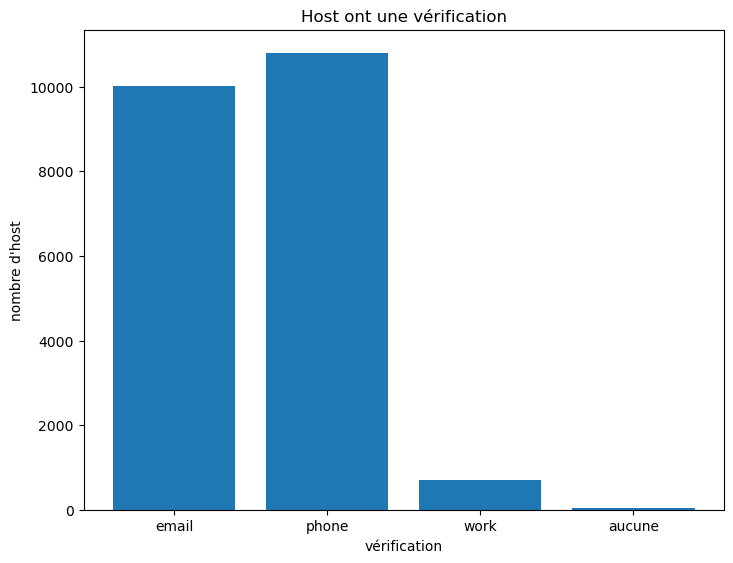

In [37]:
fig= plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Host ont une vérification")
x= ["email","phone","work","aucune"]
y= [email,phone,work,vide]
ax.bar(x,y)
ax.set_xlabel("vérification")
ax.set_ylabel("nombre d'host")
fig.show()


### Question n°4

In [38]:
df_bordeaux["np_amenities"] =  df_bordeaux['amenities'].apply(lambda elt: re.sub("\[|\]|\"","",elt))
df_bordeaux["np_amenities"] = df_bordeaux["np_amenities"].apply(lambda elt: elt.split(","))


In [39]:
df_bordeaux["np_amenities"] =  df_bordeaux["np_amenities"].apply(lambda x: len(x))


In [40]:
df_q4=df_bordeaux[["np_amenities","room_type"]].groupby('room_type').agg(["mean","std"])

<AxesSubplot:title={'center':"Nombre moyen d'ameneties"}, ylabel='room_type'>

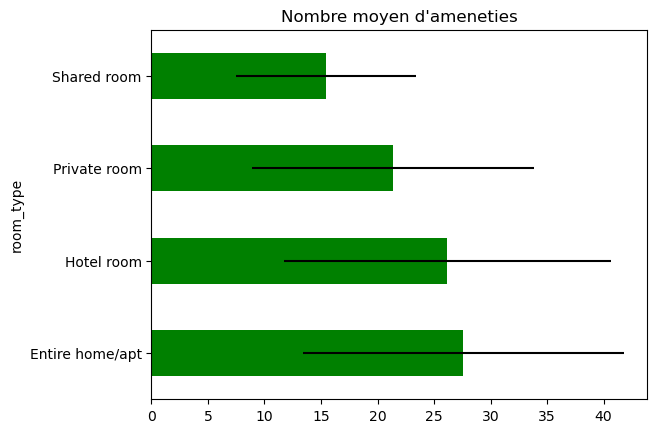

In [79]:
df_q4.plot(kind = "barh", y = "mean", legend = False,
          xerr = "std", title = "Nombre moyen d'ameneties", color='green')

### Question n° 5

In [42]:
df_bordeaux["price"]= df_bordeaux["price"].str.replace(',',"")
df_bordeaux["price"]= df_bordeaux["price"].str.replace('$',"").astype(float)

/tmp/ipykernel_6715/484732451.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_bordeaux["price"]= df_bordeaux["price"].str.replace('$',"").astype(float)


In [43]:
def q1(x):
    return x.quantile(0.25)
def q3(x):
    return x.quantile(0.75)

In [44]:
df_bordeaux[["price","room_type"]].groupby('room_type').agg(["median","max","min",q1,q3])

price                              
                median     max   min      q1      q3
room_type                                           
Entire home/apt   84.0  8890.0  12.0   60.00  130.00
Hotel room       131.0   391.0   0.0  100.00  169.00
Private room      40.0  1492.0  10.0   30.00   60.00
Shared room       42.5   275.0   9.0   25.75   49.25

### Question n°6

In [45]:
df_bordeaux["bathrooms_text"].unique()

array(['1.5 baths', '3 baths', '1 bath', '1 private bath', nan, '2 baths',
       '1 shared bath', 'Shared half-bath', '4 baths', '8 baths',
       '5 baths', '4.5 baths', '2.5 baths', '0 baths', '1.5 shared baths',
       '3.5 baths', 'Half-bath', '3 shared baths', '6 baths', '5.5 baths',
       '7 baths', '0 shared baths', '2.5 shared baths',
       'Private half-bath', '2 shared baths', '6.5 baths',
       '4 shared baths', '11.5 baths', '7.5 baths'], dtype=object)

In [46]:
def first(s):
    return(re.findall("\d+\.\d+|\d+", s))

def last(s):
    return(re.split('(\d+)', s)[-1])

In [47]:
df_bordeaux['number_bath'] = df_bordeaux['bathrooms_text'].apply(lambda x :  first(str(x)))
df_bordeaux['bath_describe'] = df_bordeaux['bathrooms_text'].apply(lambda x : last(str(x)))
df_bordeaux['number_bath'] = pd.DataFrame([x for x in df_bordeaux['number_bath'] ]) # remove list from N

In [48]:
mask = df_bordeaux["bath_describe"] == "nan"
df_bordeaux[mask]
df_bordeaux_clean = df_bordeaux.drop(df_bordeaux[mask].index)

In [49]:
df_bordeaux_clean['number_bath'].unique()

array(['1.5', '3', '1', '2', None, '4', '8', '5', '4.5', '2.5', '0',
       '3.5', '6', '5.5', '7', '6.5', '11.5', '7.5'], dtype=object)

In [50]:
df_bordeaux_clean["bath_describe"].unique()

array([' baths', ' bath', ' private bath', ' shared bath',
       'Shared half-bath', ' shared baths', 'Half-bath',
       'Private half-bath'], dtype=object)

In [51]:
df_bordeaux_clean['number_bath'] =df_bordeaux_clean['number_bath'].apply(lambda x: 1 if (x is None) else float(x))

In [52]:
df_bordeaux_clean["bath_describe"]=df_bordeaux_clean["bath_describe"].str.lower()

In [53]:
df_bordeaux_clean["bath_describe"].unique()

array([' baths', ' bath', ' private bath', ' shared bath',
       'shared half-bath', ' shared baths', 'half-bath',
       'private half-bath'], dtype=object)

In [54]:

df_bordeaux_clean['private'] = df_bordeaux_clean['bath_describe'].apply(lambda x: 2 if ("private" in x) else 1)
df_bordeaux_clean['shared'] = df_bordeaux_clean['bath_describe'].apply(lambda x: 0.5 if ("shared" in x) else 1)
df_bordeaux_clean['half_bath'] = df_bordeaux_clean['bath_describe'].apply(lambda x: 0.5 if ("half-bath" in x) else 1)



In [55]:
df_bordeaux_clean['number_bath'] = df_bordeaux_clean['number_bath'] * df_bordeaux_clean['half_bath'] * df_bordeaux_clean['private']*df_bordeaux_clean['shared']

In [56]:
df_bordeaux_clean["number_bath"].unique()

array([ 1.5 ,  3.  ,  1.  ,  2.  ,  0.5 ,  0.25,  4.  ,  8.  ,  5.  ,
        4.5 ,  2.5 ,  0.  ,  0.75,  3.5 ,  6.  ,  5.5 ,  7.  ,  1.25,
        6.5 , 11.5 ,  7.5 ])

In [57]:
df_bordeaux_clean[["host_id","number_bath"]].groupby("number_bath").count()

,host_id
number_bath,
0.00,48
0.25,16
0.50,1152
0.75,74
1.00,6449
1.25,14
1.50,479
2.00,2125
2.50,154


### Question n°7

In [58]:
df_bordeaux_simple = df_bordeaux[["number_of_reviews",'description']]

In [59]:
df_bordeaux_simple["len_description"] = df_bordeaux_simple['description'].apply(lambda x: len(str(x)))

/tmp/ipykernel_6715/1551447806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bordeaux_simple["len_description"] = df_bordeaux_simple['description'].apply(lambda x: len(str(x)))


In [60]:
df_bordeaux_simple["len_description"]

0        1000
1         912
2        1000
3        1000
4        1000
         ... 
10880    1000
10881    1000
10882     809
10883    1000
10884    1000
Name: len_description, Length: 10885, dtype: int64

In [61]:
df_bordeaux_simple["number_of_reviews"].corr(df_bordeaux_simple['len_description'])

0.1887451422744717

### question n°8

In [62]:
df_reviews_bordeaux = pd.read_csv("bordeaux/reviews_bordeaux.csv")

In [63]:
df_reviews_bordeaux.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name'], dtype='object')

In [64]:
df_reviews_bordeaux.columns=['listing_id', 'id_review', 'date', 'reviewer_id',
       'reviewer_name']

In [65]:
df_reviews_bordeaux= df_reviews_bordeaux[['listing_id', 'id_review', 'date', 'reviewer_id',
       'reviewer_name']]

In [66]:
df_reviews_bordeaux.columns

Index(['listing_id', 'id_review', 'date', 'reviewer_id', 'reviewer_name'], dtype='object')

In [67]:
df_bordeaux.columns

Index(['id', 'description', 'host_id', 'host_name', 'host_response_rate',
       'host_acceptance_rate', 'host_verifications', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'room_type', 'bathrooms', 'bathrooms_text',
       'amenities', 'price', 'number_of_reviews', 'np_amenities',
       'number_bath', 'bath_describe'],
      dtype='object')

In [68]:
df_merge = df_reviews_bordeaux.merge(df_bordeaux, how='left',left_on='listing_id',right_on='id') 

In [69]:
df_merge[["host_id","host_name","reviewer_id","reviewer_name"]]

,host_id,host_name,reviewer_id,reviewer_name
0,1127981,Luis,610681,Dallas
1,1127981,Luis,2005513,Nicolas
2,1127981,Luis,1937156,Robert
3,1127981,Luis,2001261,He
4,1127981,Luis,1766812,Etienne
...,...,...,...,...
306351,148912155,Valentin,40877952,Jude
306352,478090822,Mohammad,151433357,Moussa
306353,478090822,Mohammad,422815067,Lucas
306354,347361887,Matthieu,270567347,Belgin


In [70]:
mask = df_merge["host_name"] ==df_merge["reviewer_name"]


In [71]:
df_merge[["host_name","reviewer_name"]][mask]

,host_name,reviewer_name
490,Audrey,Audrey
1741,Marion,Marion
2454,Audrey,Audrey
3200,Christophe,Christophe
3702,Christophe,Christophe
...,...,...
303048,Sandrine,Sandrine
304817,Caroline,Caroline
304911,Stéphanie,Stéphanie
305259,Marine,Marine


In [72]:
len(df_merge[["host_name","reviewer_name"]][mask])/len(df_merge)*100

0.18475237958453564

In [73]:
import plotly.express as px

fig = px.scatter_mapbox(df_bordeaux,lat='latitude',lon='longitude',center=dict(lat=df_bordeaux.latitude.mean(), lon=df_bordeaux.longitude.mean()), zoom=7.5,
                        mapbox_style="carto-darkmatter")
                
                        
fig.update_layout(title = '', title_x=0.5)
fig.show()

In [74]:
dico={}
liste= []
for city in ["paris","bordeaux","pays_basque",'lyon',"amsterdam","antwerp","bristol","brussels","ghent","edinburgh","greater_manchester","london","rotterdam","the_hague"]:
    data = pd.read_csv(f"CSV/{city}/listings_{city}.csv")
    liste.append(data)
df_total = pd.concat(liste)

FileNotFoundError: [Errno 2] No such file or directory: 'CSV/paris/listings_paris.csv'

In [ ]:
df_total

: 